In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
import pandas as pd
import pickle
import os 
os.chdir('../')

In [2]:
def get_adaptive_metrics(metric, 
                         step_obj = 'alpha_max', 
                         temp='dula', 
                         num_seeds=10, 
                         budget=500,
                         burnin_start=False,
                         cycles=250):
    if not burnin_start: 
        base = f"figs/rbm_sample_noburninstart/num_seeds_{num_seeds}"
    else: 
        base = f"figs/rbm_sample/num_seeds_{num_seeds}"
        
    f = base + f"/{temp}_{step_obj}_budget_{budget}"
    if 'burnin' in metric: 
        with open(f"{f}_{metric}.pickle", "rb") as file: 
            return pickle.load(file)
    return np.load(f"{f}_{metric}.npy", allow_pickle=True)




Text(0.5, 0.98, 'Step Objective: alpha_max, burnin-start : True')

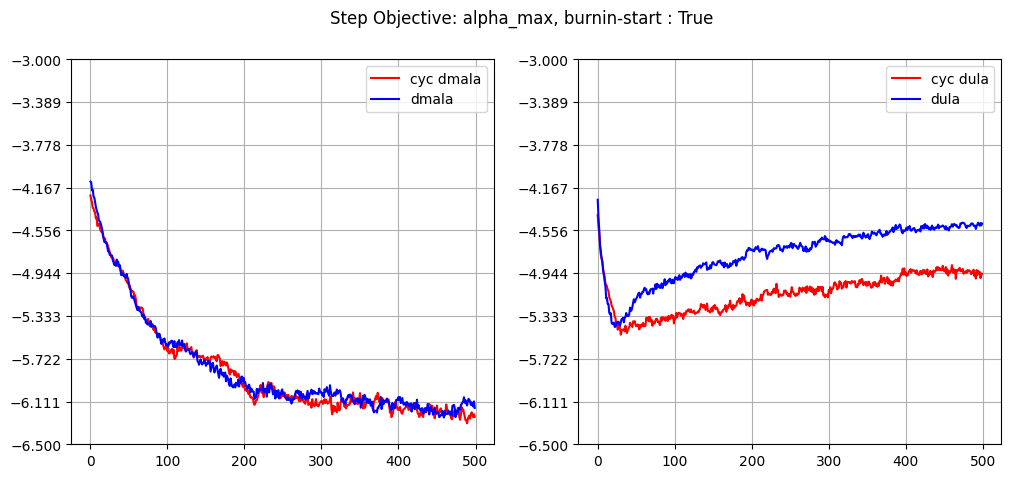

In [3]:
# making plot, comparing the cyclical version and non-cyclical versions 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
burnin_start = True 
step_obj = "alpha_max"
base_metric = "log_mmds"

cyc_dmala_mean = get_adaptive_metrics(f"{base_metric}_mean", 
                                        temp="cyc_dmala", 
                                        step_obj=step_obj,
                                         burnin_start=burnin_start)
cyc_dmala_std = get_adaptive_metrics(f"{base_metric}_var", 
                                     temp="cyc_dmala", 
                                     step_obj=step_obj,
                                     burnin_start=burnin_start) ** .5 

dmala_mean = get_adaptive_metrics(f"{base_metric}_mean", 
                                    temp="dmala", 
                                    step_obj=step_obj,
                                    burnin_start=burnin_start)
dmala_std = get_adaptive_metrics(f"{base_metric}_var", 
                                    temp="dmala", 
                                    step_obj=step_obj,
                                    burnin_start=burnin_start)

cyc_dula_mean = get_adaptive_metrics(f"{base_metric}_mean", 
                                        temp="cyc_dula", 
                                        step_obj=step_obj,
                                        burnin_start=burnin_start)
cyc_dula_std = get_adaptive_metrics(f"{base_metric}_var", 
                                    temp="cyc_dula", 
                                    step_obj=step_obj,
                                    burnin_start=burnin_start)

dula_mean = get_adaptive_metrics(f"{base_metric}_mean", 
                                    temp="dula", 
                                    step_obj=step_obj,
                                    burnin_start=burnin_start)
dula_std = get_adaptive_metrics(f"{base_metric}_var", 
                                temp="dula", 
                                step_obj=step_obj,
                                burnin_start=burnin_start)

# ax[0].plot(cyc_dmala_mean - cyc_dmala_std, 'r--')
# ax[0].plot(cyc_dmala_mean + cyc_dmala_std, 'r--')
ax[0].plot(cyc_dmala_mean, 'r-', label="cyc dmala")

# ax[0].plot(dmala_mean - dmala_std, 'b--')
# ax[0].plot(dmala_mean + dmala_std, 'b--')
ax[0].plot(dmala_mean, 'b-', label="dmala")


# ax[1].plot(cyc_dula_mean - cyc_dula_std, 'r--')
# ax[1].plot(cyc_dula_mean + cyc_dula_std, 'r--')
ax[1].plot(cyc_dula_mean, 'r-', label="cyc dula")

# ax[1].plot(dula_mean - dula_std, 'b--')
# ax[1].plot(dula_mean + dula_std, 'b--')
ax[1].plot(dula_mean, 'b-', label="dula")

ax[0].grid()
ax[0].legend()

ax[1].legend()
ax[1].grid()
for i in range(2): 
    ax[i].set_yticks(np.linspace(-3, -6.5, 10))
plt.suptitle(f"Step Objective: {step_obj}, burnin-start : {burnin_start}")

In [62]:

burnin_res_total = get_adaptive_metrics("burnin_res", temp="cyc_dmala", step_obj='alpha_min')

test = burnin_res_total[0]

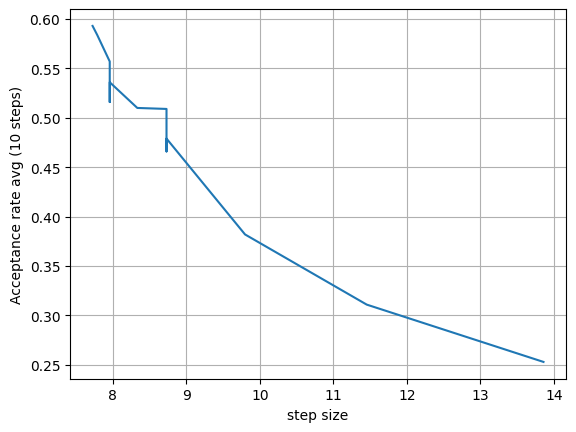

In [81]:
burnin_res_total = get_adaptive_metrics("burnin_res", temp="cyc_dmala", step_obj='alpha_max')
test = burnin_res_total[0]
plt.plot(test['step-adapt-hist']['alpha_max'], test['step-adapt-hist']['a_s'])
plt.xlabel("step size")
plt.ylabel("Acceptance rate avg (10 steps)")
plt.grid()

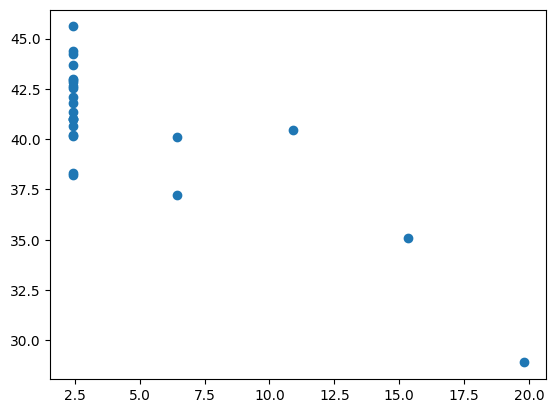

In [44]:
plt.scatter(test['step-adapt-hist']['alpha_min'], test['step-adapt-hist']['hops'])